In [14]:
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import datasets

iris=datasets.load_iris()
data=iris["data"]

model=cluster.KMeans(n_clusters=3)
model.fit(data)

labels=model.labels_

x_index=2
y_index=3

data_x=data[:,x_index]
data_y=data[:,y_index]

x_max=7.5
x_min=0
y_max=3
y_min=0
x_label=iris["feature_names"][x_index]
y_label=iris["feature_names"][y_index]

print(model.labels_)
print(data_x[labels==0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.5 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4]


In [13]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.loc[df['target'] == 0, 'target'] = "setosa"
df.loc[df['target'] == 1, 'target'] = "versicolor"
df.loc[df['target'] == 2, 'target'] = "virginica"

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
from sklearn.svm import SVC

fig,axes=plt.subplots(3,3,figsize=(10,10))
for ax_row,C in zip()

In [25]:
import matplotlib.pyplot as plt
import numpy as np 

### 各種定義

# x軸の定義範囲
x_max = 1
x_min = -1

# y軸の定義範囲
y_max = 2
y_min = -1

# スケール、１単位に何点を使うか
SCALE = 50

# train/testでTestデータの割合を指定
TEST_RATE = 0.3


### データ生成

data_x = np.arange(x_min, x_max, 1 / float(SCALE)).reshape(-1, 1)  


In [17]:
data_ty=data_x*data_x  # y=x^2

In [22]:
data_vy=data_ty.reshape(-1,1)+np.random.randn(len(data_ty),1)*0.5
print(data_ty.shape)
print(data_ty.reshape(-1,1).shape)
print(np.random.randn(len(data_ty),1).shape)

(100, 1)
(100, 1)
(100, 1)


In [43]:
# 学習データ／テストデータの分割処理
def split_train_test(array):
    length = len(array)
    n_train = int(length * (1 - TEST_RATE))  # 0.7掛けることで70％のトレインするデータ量を決める

    index = list(range(length))
    np.random.shuffle(index)  # ランダムにシャッフルする
    idx_train = index[:n_train]  # シャッフルされたインデックス番号を練習とテストに分割する
    idx_test = index[n_train:]

    return sorted(array[idx_train]), sorted(array[idx_test])

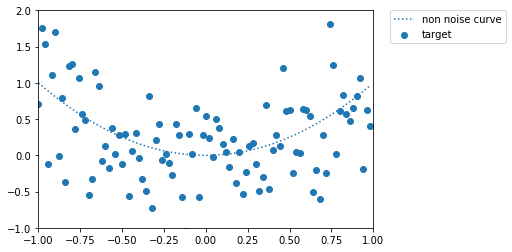

In [44]:
# インデックスリストを分割
indices = np.arange(len(data_x))  # インデックス値のリスト
idx_train, idx_test = split_train_test(indices)

# 学習データ
x_train = data_x[idx_train]
y_train = data_vy[idx_train]

# テストデータ
x_test = data_x[idx_test]
y_test = data_vy[idx_test]


### グラフ描画

# 分析対象点の散布図
plt.scatter(data_x, data_vy, label='target')

# 元の線を表示
plt.plot(data_x, data_ty, linestyle=':', label='non noise curve') # 元の線を表示

# x 軸 / y 軸の範囲を設定
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# 凡例の表示位置を指定
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# グラフを表示
plt.show()


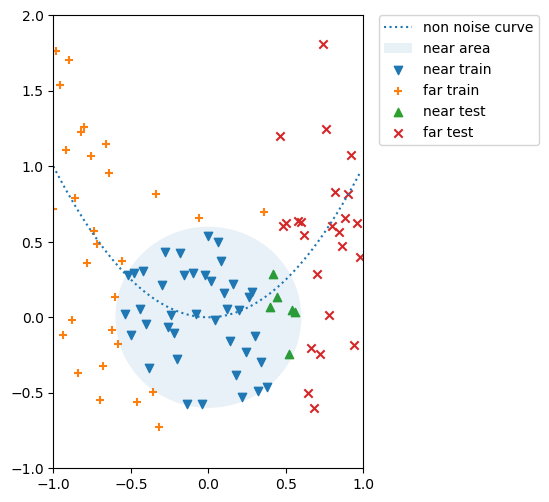

In [36]:
########################################
#### 分類問題

### 分類ラベル作成

# クラスの閾値。原点からの半径
CLASS_RADIUS = 0.6

# data_xの2乗とdata_vyの2乗を加算しあう数列（100,1）をT/F配列にする
labels = (np.square(data_x) + np.square(data_vy)) < CLASS_RADIUS**2

# idx_trainかつ、0.6半径内（TRUE）に絞り込んだインデックス番号にする
label_train = labels[idx_train]  # T/F配列をシャッフルした配列（train/test）に2分する
label_test = labels[idx_test]  # テストデータ


### グラフ描画

plt.figure(figsize=(4, 6), dpi=100)

plt.scatter(x_train[label_train], y_train[label_train], marker='v', label='near train')
plt.scatter(x_train[label_train != True], y_train[label_train != True], marker='+', label='far train')

plt.scatter(x_test[label_test], y_test[label_test], marker='^', label='near test')
plt.scatter(x_test[label_test != True], y_test[label_test != True], marker='x', label='far test')

# 元の線を表示
plt.plot(data_x, data_ty, linestyle=':', label='non noise curve') # 元の線を表示

# クラスの分離円
circle  = plt.Circle((0,0), CLASS_RADIUS, alpha=0.1, label='near area')
ax = plt.gca()
ax.add_patch(circle)

# x 軸 / y 軸の範囲を設定
plt.xlim(x_min, x_max)  #X軸範囲設定
plt.ylim(y_min, y_max)  #Y軸範囲設定

# 凡例の表示位置を指定
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# グラフを表示
plt.show()


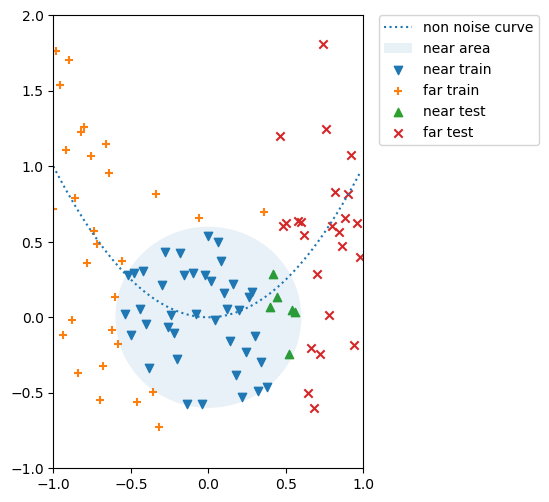

accuracy_score:
 0.6666666666666666
Confusion matrix:
 [[14 10]
 [ 0  6]]


In [34]:
########################################
#### 分類問題

### 分類ラベル作成

# クラスの閾値。原点からの半径
CLASS_RADIUS = 0.6

# 近い／遠いでクラス分け -- 近いと True, 遠いと False
labels = (np.square(data_x) + np.square(data_vy)) < CLASS_RADIUS**2

# 学習データ／テストデータに分割
label_train = labels[idx_train]  # 学習データ
label_test = labels[idx_test]  # テストデータ


### グラフ描画

plt.figure(figsize=(4,6),dpi=100)

plt.scatter(x_train[label_train], y_train[label_train], marker='v', label='near train')
plt.scatter(x_train[label_train != True], y_train[label_train != True], marker='+', label='far train')

plt.scatter(x_test[label_test], y_test[label_test], marker='^', label='near test')
plt.scatter(x_test[label_test != True], y_test[label_test != True], marker='x', label='far test')

# 元の線を表示
plt.plot(data_x, data_ty, linestyle=':', label='non noise curve') # 元の線を表示

# クラスの分離円
circle  = plt.Circle((0,0), CLASS_RADIUS, alpha=0.1, label='near area')
ax = plt.gca()
ax.add_patch(circle)

# x 軸 / y 軸の範囲を設定
plt.xlim(x_min, x_max)  #X軸範囲設定
plt.ylim(y_min, y_max)  #Y軸範囲設定

# 凡例の表示位置を指定
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# グラフを表示
plt.show()


### 学習

from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score

data_train = np.c_[x_train, y_train]
data_test = np.c_[x_test, y_test]

# SVMの分類器を作成、学習
classifier = svm.SVC(gamma=1)
classifier.fit(data_train, label_train.reshape(-1))

# Testデータで評価
pred_test = classifier.predict(data_test)

# Accuracyを表示
print('accuracy_score:\n', accuracy_score(label_test.reshape(-1), pred_test)) 

# 混同行列を表示
print('Confusion matrix:\n', confusion_matrix(label_test.reshape(-1), pred_test))



In [40]:
label_test.reshape(-1)!=pred_test

array([False, False, False, False,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False])

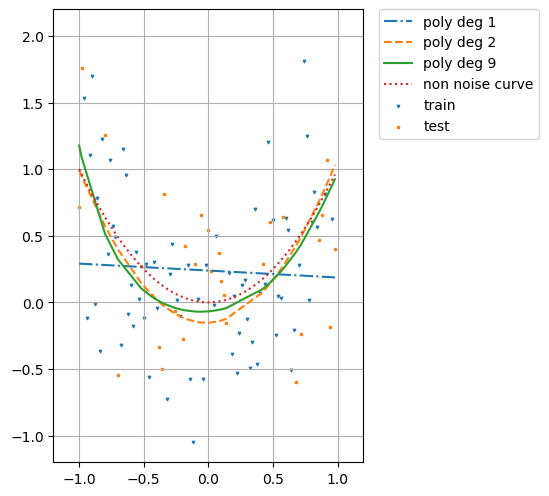

In [63]:
########################################
#### 回帰問題

from sklearn import linear_model
plt.figure(figsize=(4,6),dpi=100)


### 1 次式で回帰

# x 値
X1_TRAIN = x_train
X1_TEST  = x_test

# 学習
model = linear_model.LinearRegression()
model.fit(X1_TRAIN, y_train)

# グラフに描画
plt.plot(x_test, model.predict(X1_TEST), linestyle='-.', label='poly deg 1')


### 2 次式で回帰

# x 値
X2_TRAIN = np.c_[x_train**2, x_train]
X2_TEST  = np.c_[x_test**2, x_test]

# 学習
model = linear_model.LinearRegression()
model.fit(X2_TRAIN, y_train)

# グラフに描画
plt.plot(x_test, model.predict(X2_TEST), linestyle='--', label='poly deg 2')


### 9 次式で回帰

# x 値
X9_TRAIN = np.c_[x_train**9, x_train**8, x_train**7, x_train**6, x_train**5,
                 x_train**4, x_train**3, x_train**2, x_train]
X9_TEST  = np.c_[x_test**9, x_test**8, x_test**7, x_test**6, x_test**5,
                 x_test**4, x_test**3, x_test**2, x_test]
# 学習
# model=linear_model.LinearRegression()
model = linear_model.Ridge(alpha=1)
model.fit(X9_TRAIN, y_train)

# グラフに描画
plt.plot(x_test, model.predict(X9_TEST), linestyle='-', label='poly deg 9')


### データの表示

plt.scatter(x_train, y_train, marker='v',s=3,label="train")
plt.scatter(x_test, y_test, marker='x',s=3,label="test")

# 元の線を表示
plt.plot(data_x, data_ty, linestyle=':', label='non noise curve') # 元の線を表示

# x 軸 / y 軸の範囲を設定
plt.xlim(x_min-0.2, x_max+0.2)
plt.ylim(y_min-0.2, y_max+0.2)

# 凡例の表示位置を指定
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# グラフを表示
plt.grid()
plt.show()

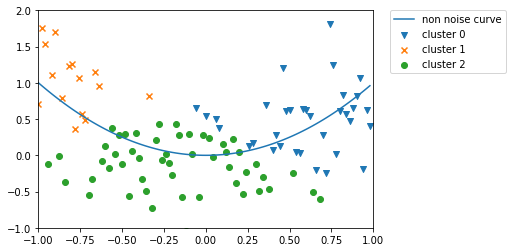

In [65]:
########################################
#### クラスタリング

from sklearn import cluster

# x, y データを結合
data = np.c_[data_x, data_vy]

# 学習 → ３つのクラスタに分類
model = cluster.KMeans(n_clusters=3)
model.fit(data)

# data の分類結果（0 ～ (n_clusters - 1) の番号が付けられている）
labels = model.labels_

plt.scatter(data_x[labels == 0], data_vy[labels == 0], marker='v', label='cluster 0')
plt.scatter(data_x[labels == 1], data_vy[labels == 1], marker='x', label='cluster 1')
plt.scatter(data_x[labels == 2], data_vy[labels == 2], marker='o', label='cluster 2')

# 元の線を表示
plt.plot(data_x, data_ty, linestyle=':', label='non noise curve') # 元の線を表示

# x 軸 / y 軸の範囲を設定
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# 凡例の表示位置を指定
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# グラフを表示
plt.show()
